In [20]:
import numpy as np
from datetime import datetime, timedelta
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt

from collections import defaultdict


In [21]:
import json
  
# read json data file
f=open('taxi_requests.json')
data = json.load(f)
f.close()

login_times=data['request_time']

# uncomment next line to see how the data looks like
# display(login_times) 

In [22]:
len(login_times)

93142

In [23]:
# convert time string to timestamps
timestamps=[datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').timestamp() for i in range(len(login_times))]

print(timestamps[:5])

[60198.0, 60370.0, 60397.0, 60396.0, 60981.0]


In [24]:
type(timestamps)

list

# Written questions

Please search online and read the documentation for strptime() and timestamp() and write down short answers to the following questions:

A- What does the previous cell do? 

    * At first, it has used for-loop to operate on all dates. After that, it used strptime() to convert the dates in string type to datetime objects. Eventually, it used timestamp() to convert datetimes to timestamp format.

B- What does the concept of "timestamp" mean? What are its type and unit?
    
    * A timestamp is encoded information about the time used in Unix. A timestamp indicates the date and time of a specific event that has occurred. This information could be accurate to the microseconds.
    * Unix time indicates a point in time. This number is actually the number of seconds that have passed since the Unix epoch, minus the leap seconds(From 1 January 1970). 
    * The timestamp function reterns a number with float type. Actually, it's a POSIX timestamp corresponding to the datetime instance.
    * The unit of timestamp is second

C- Is the variable "timestamps" a list or a numpy array?

    * It's a list

D- Which day of week (Sunday, Monday, ...) is 1970-01-01?

    * It was Thursday

E- Which function can convert a timestamp back to datetime?

    * date_obj = datetime.fromtimestamp(timestamp)


In [25]:
day_of_week = {0: 'Monday',
                1: 'Tuesday',
                2: 'Wednesday',
                3: 'Thursday',
                4: 'Friday',
                5: 'Saturday',
                6: 'Sunday'}

In [26]:
check_weekday = datetime(1970,1,1)
day_of_week[check_weekday.weekday()]

'Thursday'

# Project questions

Explore data, write code, and search online to answer the following questions about the data:

1- How many days are there in the data?

2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

3- Which hour was the busiest hour (the hour with the most requests)?

4- Are there any two requests that happened at the same time?

5- What is the longest gap between two consequent requests?

6- Overall, does the volume of requests increase or decrease over time?

7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM

8- Bonus: Which day of week is the busiest?

9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.

10- Bonus: Which dates other than the standard weekend days were holidays?

#### 1- How many days are there in the data?

In [27]:
dates_times = [datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S') for i in range(len(login_times))]

print(dates_times[:5])

[datetime.datetime(1970, 1, 1, 20, 13, 18), datetime.datetime(1970, 1, 1, 20, 16, 10), datetime.datetime(1970, 1, 1, 20, 16, 37), datetime.datetime(1970, 1, 1, 20, 16, 36), datetime.datetime(1970, 1, 1, 20, 26, 21)]


In [28]:
days_of_data = [date.weekday() for date in dates_times]

unique_days, count_days = np.unique(days_of_data, return_counts=True)
print("Number of days in data: ",len(unique_days))

for i in unique_days:
    print(f"Number of {day_of_week[i]}: {count_days[i]}")

Number of days in data:  7
Number of Monday: 8823
Number of Tuesday: 9268
Number of Wednesday: 10339
Number of Thursday: 11960
Number of Friday: 15208
Number of Saturday: 19377
Number of Sunday: 18167


#### 2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

In [52]:
dates = [date_time.date() for date_time in dates_times]

unique_dates, count_dates = np.unique(dates, return_counts=True)

zipped = zip(unique_dates, count_dates)
sorted_zip = sorted(zipped, key = lambda x: x[1])

print("The busiest date is: ", sorted_zip[-1])

print("The second busiest date", sorted_zip[-2])


The busiest date is:  (datetime.date(1970, 4, 4), 1889)
The second busiest date (datetime.date(1970, 3, 14), 1706)


# Sample answer to problem 2

Here is an answer to problem 2. We advise to try to solve this problem before you see the answer below


In [30]:
day_number=np.array(timestamps).astype(int)//(24*60*60) # find day number for all requests
unique, counts = np.unique(day_number, return_counts=True) # find how many requests are in each day

maxday=np.argmax(counts) # find the day with the maximum requests
print("the busiest day is day number ",unique[maxday])

the busiest day is day number  92


#### 3- Which hour was the busiest hour (the hour with the most requests)?

In [31]:
hours = [date_time.hour for date_time in dates_times]
unique_hour, count_hours = np.unique(hours, return_counts=True)
busiest_hour = unique_hour[np.argmax(count_hours)]
print("The busiest hour is:", busiest_hour)


The busiest hour is: 22


#### 4- Are there any two requests that happened at the same time?


In [32]:
unique_timestamps, count_timestamps = np.unique(timestamps, return_counts=True)

if sum(count_timestamps>1) > 0:
    print(f"Yes, There are")
    print(sum(count_timestamps>1))
else:
    print("No!")


Yes, There are
868


#### 5- What is the longest gap between two consequent requests?

In [33]:
gaps = np.subtract(timestamps[1:], timestamps[:-1])
print(sum(gaps < -1))

39167


The unsorted data is our problem here

In [34]:
sorted_timestamps = timestamps.copy()
sorted_timestamps.sort()


gaps = np.subtract(sorted_timestamps[1:], sorted_timestamps[:-1])
print("Number of wrong gaps: ", sum(gaps < -1))

print("Longest gap: ", gaps.max(), "s")

Number of wrong gaps:  0
Longest gap:  5501.0 s


#### 6. Overall, does the volume of requests increase or decrease over time?

The slop is + so the volume of the requests is increasing overall.


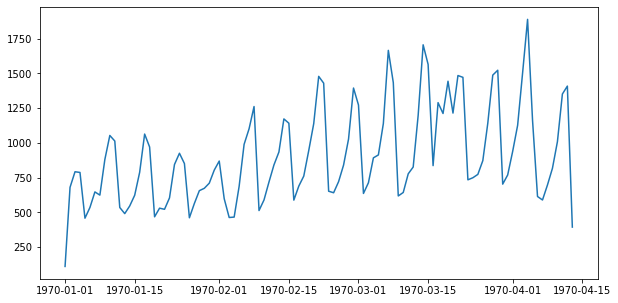

In [49]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.plot(unique_dates, count_dates)


slope, intercept = np.polyfit(count_dates, range(len(count_dates)),1)

if slope > 0:
    print("The slop is + so the volume of the requests is increasing overall.")
elif slope < 0:
    print("The slop is - so the volume of the requests is  decreasing overall.")
else:
    print("The slop is 0 so the volume of the requests is static overall.")



As a result of the plot and slope of the data, I think the volume of the requests is increasing, but it fluctuates a lot  .

#### 7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM


In [36]:
requests_6_9 = [with_hour for with_hour in dates_times if (with_hour.hour>=6 and with_hour.hour<9)]

dict_of_dates = defaultdict(list)

for date_time in requests_6_9:
    t = date_time.time()
    dict_of_dates[date_time.date()].append((t.hour * 60 + t.minute) * 60 + t.second)


for date in dict_of_dates:
    dict_of_dates[date] = str(timedelta(seconds=int(np.mean(dict_of_dates[date]))))


print(dict_of_dates)

defaultdict(<class 'list'>, {datetime.date(1970, 1, 2): '7:33:16', datetime.date(1970, 1, 3): '7:21:27', datetime.date(1970, 1, 4): '6:56:26', datetime.date(1970, 1, 5): '7:57:57', datetime.date(1970, 1, 6): '7:39:51', datetime.date(1970, 1, 7): '7:33:48', datetime.date(1970, 1, 8): '7:52:17', datetime.date(1970, 1, 9): '7:11:39', datetime.date(1970, 1, 10): '6:58:04', datetime.date(1970, 1, 11): '6:50:49', datetime.date(1970, 1, 12): '7:55:08', datetime.date(1970, 1, 13): '7:32:31', datetime.date(1970, 1, 14): '7:39:49', datetime.date(1970, 1, 15): '7:27:53', datetime.date(1970, 1, 16): '7:39:59', datetime.date(1970, 1, 17): '7:17:16', datetime.date(1970, 1, 18): '7:18:00', datetime.date(1970, 1, 19): '7:42:00', datetime.date(1970, 1, 20): '7:55:25', datetime.date(1970, 1, 21): '7:49:50', datetime.date(1970, 1, 22): '7:28:11', datetime.date(1970, 1, 23): '7:30:43', datetime.date(1970, 1, 24): '6:59:12', datetime.date(1970, 1, 25): '7:04:53', datetime.date(1970, 1, 26): '7:31:37', date

#### 8- Bonus: Which day of week is the busiest?


In [37]:
week_days = [date_time.weekday() for date_time in dates_times]

unique_weekdays, count_weekdays = np.unique(week_days, return_counts=True)
busiest_weekday = unique_weekdays[np.argmax(count_weekdays)]
print("The busiest day of the week is:", day_of_week[busiest_weekday])

The busiest day of the week is: Saturday


9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.


In [38]:
hours_of_day_of_week = defaultdict(lambda: defaultdict(lambda: 0))


for date_time in dates_times:
    hours_of_day_of_week[date_time.hour][day_of_week[date_time.weekday()]] += 1/count_weekdays[date_time.weekday()]


for hour in hours_of_day_of_week:
    for day in hours_of_day_of_week[hour]:
        print(f"+ Average {day} - hour:{hour} --> {hours_of_day_of_week[hour][day]}\n")
    

+ Average Thursday - hour:20 --> 0.05200668896321117

+ Average Friday - hour:20 --> 0.05280115728563848

+ Average Saturday - hour:20 --> 0.03622851834649345

+ Average Sunday - hour:20 --> 0.033687455276049855

+ Average Monday - hour:20 --> 0.04261589028675033

+ Average Tuesday - hour:20 --> 0.05265429434613758

+ Average Wednesday - hour:20 --> 0.048360576458071895

+ Average Thursday - hour:21 --> 0.0727424749163891

+ Average Friday - hour:21 --> 0.07930036822724941

+ Average Saturday - hour:21 --> 0.04510502141714478

+ Average Sunday - hour:21 --> 0.0344030384763581

+ Average Monday - hour:21 --> 0.06857078091352058

+ Average Tuesday - hour:21 --> 0.07596029348295266

+ Average Wednesday - hour:21 --> 0.07147693200503079

+ Average Thursday - hour:22 --> 0.09105351170568736

+ Average Friday - hour:22 --> 0.09988164124145422

+ Average Saturday - hour:22 --> 0.059968003302886534

+ Average Sunday - hour:22 --> 0.03209115429074684

+ Average Monday - hour:22 --> 0.0692508217

#### 10- Bonus: Which dates other than the standard weekend days were holidays?

In [39]:
# I assumed that Sunday and Monday are weekends
requests_without_weekends = [date_time for date_time in dates_times if (date_time.weekday() != 0 or date_time.weekday() != 6)]


def filter_by_worktime(data):
    dict_hours_each_day = defaultdict(list)
    dict_std_of_hours_each_day = defaultdict(float)
    dict_mean_of_hours_each_day = defaultdict(datetime)

    all_times = []


    requests_7_18 = [date_time for date_time in data if (date_time.hour>=7 and date_time.hour<=18)]

 
    for day in requests_7_18:
        t = day.time()
        t = (t.hour * 60 + t.minute) * 60 + t.second
        all_times.append(t)
        dict_hours_each_day[day.date()].append(t)

    total_mean = np.mean(all_times)
    total_std = np.std(all_times)


    for day in dict_hours_each_day:
        dict_mean_of_hours_each_day[day] = np.mean(dict_hours_each_day[day])
        dict_std_of_hours_each_day[day] = np.std(dict_hours_each_day[day])

        
    result = [date_time for date_time in dict_hours_each_day if (dict_mean_of_hours_each_day[date_time] < total_mean 
                                                                and 
                                                                dict_std_of_hours_each_day[date_time] < total_std
                                                                )]
        
    
    return result



holidays = filter_by_worktime(requests_without_weekends)
print("++ Holidays --> ", holidays)


++ Holidays -->  [datetime.date(1970, 1, 2), datetime.date(1970, 1, 5), datetime.date(1970, 1, 6), datetime.date(1970, 1, 7), datetime.date(1970, 1, 8), datetime.date(1970, 1, 12), datetime.date(1970, 1, 13), datetime.date(1970, 1, 14), datetime.date(1970, 1, 15), datetime.date(1970, 1, 16), datetime.date(1970, 1, 19), datetime.date(1970, 1, 20), datetime.date(1970, 1, 21), datetime.date(1970, 1, 22), datetime.date(1970, 1, 23), datetime.date(1970, 1, 26), datetime.date(1970, 1, 27), datetime.date(1970, 1, 28), datetime.date(1970, 1, 29), datetime.date(1970, 2, 3), datetime.date(1970, 2, 4), datetime.date(1970, 2, 5), datetime.date(1970, 2, 6), datetime.date(1970, 2, 9), datetime.date(1970, 2, 10), datetime.date(1970, 2, 11), datetime.date(1970, 2, 12), datetime.date(1970, 2, 16), datetime.date(1970, 2, 17), datetime.date(1970, 2, 18), datetime.date(1970, 2, 19), datetime.date(1970, 2, 20), datetime.date(1970, 2, 25), datetime.date(1970, 2, 26), datetime.date(1970, 3, 2), datetime.date